# Importation  des données MINST et des bibliothéques

In [3]:
# Importation du dataset MINST depuis Keras
from notify_run import Notify # pour m'envoyer des notification
from keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [4]:
notify = Notify()
notify.register()

Endpoint: https://notify.run/PCLE66uCAf4pAk1l
To subscribe, open: https://notify.run/c/PCLE66uCAf4pAk1l
Or scan this QR code:

                                                              
                                                              
                                                              
                                                              
                                                              
                                                              
                                                              
                                                              
                                                              
                                                              
                                                              
                                                              
                                                              
                                                              
                                                              
                                                              
                                                              
                                                              
                                                              
                                                              
                                                              
                                                              
                                                              
                                                              
                                                              
                                                              
                                                              
                                                              
                                                              
                                                              
                                                              

Le dataste comporte des nombres de 0 à 9 de 28 sur 28 pixels. Les images sont monochromes.

In [5]:
# vérifions le type : ceux sont de numpy array
print(type(x_train))
print(type(x_test))
print(type(y_train))
print(type(y_test))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [6]:
print(x_train.shape)
print(x_test.shape)
print(f'x_train comporte {x_train.shape[0]} images')
print(f'x_test comporte  {x_test.shape[0]} images')

(60000, 28, 28)
(10000, 28, 28)
x_train comporte 60000 images
x_test comporte  10000 images


<Figure size 432x288 with 0 Axes>

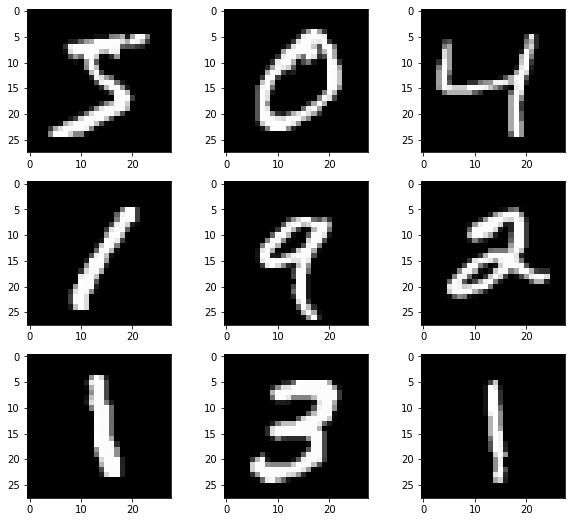

In [7]:
import matplotlib.pyplot as plt
plt.gray()
plt.figure(figsize = (10,9))
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(x_train[i])

In [8]:
# Exemple d'impression dans y_train
for i in range(5):
    print(y_train[i])

5
0
4
1
9


## Prétraitement des données

In [9]:
# Vérification des valeurs minimale et maximale de x_train
print(x_train.min())
print(x_train.max())

0
255


In [10]:
# On s'assurer que les valeurs sont flottantes afin que nous puissions obtenir des points décimaux après la division
x_train = x_train.astype('float')
x_test = x_test.astype('float')

In [11]:
# Normaliser les codes RVB en les divisant par la valeur RVB maximale.
x_train = x_train/255.0
x_test = x_test/255.0

In [12]:
# Vérification des valeurs minimale et maximale de x_train
print(x_train.min())
print(x_train.max())

0.0
1.0


Les données d'entrée doivent être converties du format tridimensionnel au format bidimensionnel pour être introduites dans l'algorithme de clustering K-Means. Par conséquent, les données d'entrée doivent être remodelées.

In [13]:
# Redimmension des données d'entrée
X_train = x_train.reshape(len(x_train),-1)
X_test = x_test.reshape(len(x_test),-1)

In [14]:
# Vérification des dimensions
print(X_train.shape)
print(X_test.shape)

(60000, 784)
(10000, 784)


Maintenant que le prétraitement des données est terminé, nous passons à la construction du modèle avec Mini Batch K-Means.

## Construction du modèle Mini Batch K-Means

Mini Batch K-Means fonctionne de manière similaire à l'algorithme K-Means. La différence est que dans le Mini Batch K-Means, l'étape la plus coûteuse en calcul est effectuée uniquement sur un échantillon aléatoire d'observations par opposition à toutes les observations. Cette approche peut réduire considérablement le temps nécessaire à l'algorithme pour trouver la convergence avec seulement un faible coût en qualité.

In [15]:
from sklearn.cluster import MiniBatchKMeans
import numpy as np
total_clusters = len(np.unique(y_test))
# Initialisation du modèle K-means
kmeans = MiniBatchKMeans(n_clusters = total_clusters)
kmeans.fit(X_train)

MiniBatchKMeans(n_clusters=10)

In [16]:
# Labels
kmeans.labels_

array([4, 3, 8, ..., 4, 5, 4])

In [17]:
# centroides
kmeans.cluster_centers_

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

Les images sont classées en groupes en fonction de la similitude des valeurs de pixels. Chaque image se voit attribuer une valeur d'étiquette de cluster donnée par kmeans.labels_. Mais kmeans.labels_ ne désigne que le cluster auquel appartient l'image. Il ne désigne pas le nombre affiché dans l'image.

On va créer une fonction qui associe  le label le plus probable à chaque cluster dans le modèle KMeans 
qui renvoie un  dictionnaire des clusters assignés à chaque label.

In [18]:
def retrieve_info(cluster_labels,y_train):
    reference_labels = {}
    for i in range(len(np.unique(kmeans.labels_))):
        index = np.where(cluster_labels == i,1,0)
        num = np.bincount(y_train[index==1]).argmax()
        reference_labels[i] = num
    return reference_labels

In [19]:
reference_labels = retrieve_info(kmeans.labels_,y_train)

In [20]:
print(reference_labels)

{0: 0, 1: 9, 2: 1, 3: 0, 4: 8, 5: 6, 6: 1, 7: 7, 8: 4, 9: 3}


Regardons reference_label: c'est à dire au cluster 0  on a le groupe d'image 0 , au cluster 1 on a le groupe d'image 9, au cluster 2 on a le groupe d'image 1 etc...). 

Avec la fonction 'retrieve_info' nous allons imprimer le 'y_pred' prédit et la comparer l'étiquette réelle pour les 20 premiers exemples

In [21]:
y_pred = np.random.rand(len(kmeans.labels_))
for i in range(len(kmeans.labels_)):
    y_pred[i] = reference_labels[kmeans.labels_[i]]

In [22]:
# Comparaison des valeurs prédites et des valeurs réelles
print("Valeurs prédites:")
print(y_pred[:20].astype('int'))
print("============================================================")
print("Valeurs réelles:")
print(y_train[:20])

Valeurs prédites:
[8 0 4 1 9 6 1 8 1 7 3 1 3 6 1 7 6 8 6 7]
Valeurs réelles:
[5 0 4 1 9 2 1 3 1 4 3 5 3 6 1 7 2 8 6 9]


## Accuracy score

In [23]:
# accuracy score
from sklearn.metrics import accuracy_score
print(f'L\'accuracy score du train set est de: {accuracy_score(y_pred,y_train)}')

L'accuracy score du train set est de: 0.5131166666666667


In [24]:
# Notification de la fin du premier algo 
notify.send(f'Le premier algo est terminer Malika! L\'accuracy est de {accuracy_score(y_pred,y_train)}')

Text(0.5, 257.44, 'Predicted label')

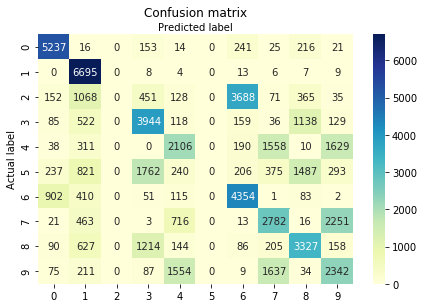

In [25]:
# matrice de confusion
from sklearn.metrics import confusion_matrix
import seaborn as sns
import pandas as pd
conf_matrix = confusion_matrix(y_train, y_pred)

# plottage 

class_names=[0,1, 2, 3, 4, 5, 6, 7, 8, 9] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

sns.heatmap(pd.DataFrame(conf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

Le groupe des 2 et des 5 il ne sait pas les classer, il fait beaucoup de confusion pour les autres nombres.

## Optimisation de l'algorithme

In [26]:
def calculate_metrics(model,output):
    print(f'Le nombre de cluster est de {model.n_clusters}')
    print(f'L\'inertie est de: {model.inertia_}')
    print(f'L\'homogeneîté est de: {metrics.homogeneity_score(output,model.labels_)}')

In [27]:
from sklearn import metrics
cluster_number = [10,16,36,64,144,256]
for i in cluster_number:
    total_clusters = len(np.unique(y_test))

kmeans = MiniBatchKMeans(n_clusters = i)
kmeans.fit(X_train) 
calculate_metrics(kmeans,y_train)
# Calcule des  reference_labels
reference_labels = retrieve_info(kmeans.labels_,y_train)
# y_pred la prediction des label
y_pred = np.random.rand(len(kmeans.labels_))
for i in range(len(kmeans.labels_)):
    y_pred[i] = reference_labels[kmeans.labels_[i]]
    
print(f'L\'accuracy est de: {accuracy_score(y_pred,y_train)}')


Le nombre de cluster est de 256
L'inertie est de: 1522084.8877780815
L'homogeneîté est de: 0.8347029336862404
L'accuracy est de: 0.8874666666666666


J'ai fait des testes allant jusqu'a 640  cluster, j'obtiens 91% d'accuracy y a pas énormement de différence pour un si grand nombre de cluster je pense pas que se soit judicieux. Le fait d'avoir 256 clusters pour 10 nombre vient du faite que se soit écrit à la main et qu'il y'ai plusieurs maniéres d'écrire une nombre. Chacun son écriture !!!!

**Résultat obtenu pour 640 clusters**:

- Le nombre de cluster est de 640
- L'inertie est de: 1352653.5
- L'homogeneîté est de: 0.8793984040204451
- L'accuracy est de: 0.9177833333333333

La précision est de 88,7% pour «nombre de clusters» = 256. Par conséquent, nous exécutons le modèle sur l'ensemble de test pour le nombre de clusters = 256.

In [28]:
# Testdu modèle sur le Test set
kmeans = MiniBatchKMeans(n_clusters = 256)
kmeans.fit(X_test)
# Calcule des metriques
calculate_metrics(kmeans,y_test)
# Calcule des reference_labels
reference_labels = retrieve_info(kmeans.labels_,y_test)
# y_pred nos predictions
y_pred = np.random.rand(len(kmeans.labels_))
for i in range(len(kmeans.labels_)):
    y_pred[i] = reference_labels[kmeans.labels_[i]]
    
    
print(f'L\'accuracy est de: {accuracy_score(y_pred,y_test)}')

Le nombre de cluster est de 256
L'inertie est de: 246187.43542081624
L'homogeneîté est de: 0.8516496500548324
L'accuracy est de: 0.8923


In [29]:
# Notification de la fin du second algo 
notify.send(f'Le second algo est terminer Malika! L\'accuracy est de {accuracy_score(y_pred,y_test)}')

Text(0.5, 257.44, 'Predicted label')

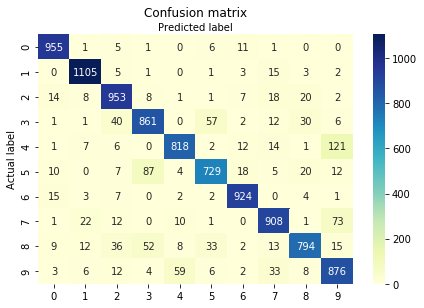

In [30]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import pandas as pd
conf_matrix2 = confusion_matrix(y_test, y_pred)

# plottage 

class_names=[0,1, 2, 3, 4, 5, 6, 7, 8, 9] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

sns.heatmap(pd.DataFrame(conf_matrix2), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

On voit une nette amélioration. Il y a encore des erreurs de classification mais beaucoup moins. Il faudrait pouvoir améliorer les prédictions.

## Nouvelles prédictions

In [39]:
# RGB image is converted to Monochrome image
from skimage import color
from skimage import io
image1 = color.rgb2gray(io.imread("Capture d’écran (1143).png"))

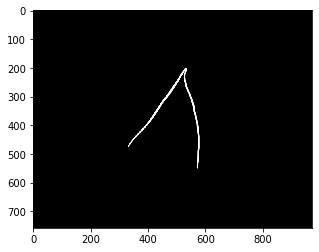

In [40]:
plt.imshow(image1)
image1.shape
from skimage.transform import resize
size = (28, 28)
image1_resize = resize(image1,size,anti_aliasing=True)

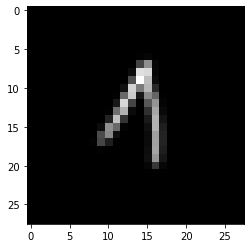

In [41]:
plt.imshow(image1_resize)

In [42]:
image1_resize.shape

(28, 28)

In [43]:
image1_resize = image1_resize.reshape(1, 28*28)
image1_resize.shape


(1, 784)

In [44]:
predicted_cluster = kmeans.predict(image1_resize)

In [45]:
y_pred[[predicted_cluster]]

C:\Users\ouizb\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  """Entry point for launching an IPython kernel.


array([5.])

In [46]:
# Notification de la  nouvelle prédiction 
notify.send("Il a fini la nouvelle prédiction 1 Malika!")

Il prédit l'image comme étant un 5. Mon modèle doit encore être amelioré.

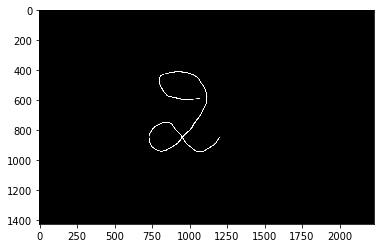

In [47]:
image2 = color.rgb2gray(io.imread("nb2.png"))
plt.imshow(image2)
image2_resize = resize(image2,size,anti_aliasing=True)

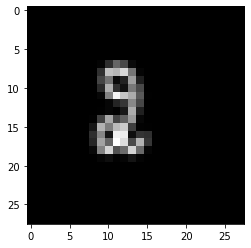

In [48]:
plt.imshow(image2_resize)

In [49]:
image2_resize.shape

(28, 28)

In [50]:
image2_resize = image2_resize.reshape(1, 28*28)
image2_resize.shape

(1, 784)

In [52]:
predicted_cluster2 = kmeans.predict(image2_resize)
y_pred[[predicted_cluster2]]


C:\Users\ouizb\anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  


array([5.])

In [ ]:
# Notification de la  nouvelle prédiction 
notify.send("Il a fini la nouvelle prédiction 2 Malika!")

Il prédit l'image comme étant un 5. Cette fois-ci je vais tester le nombre 5.

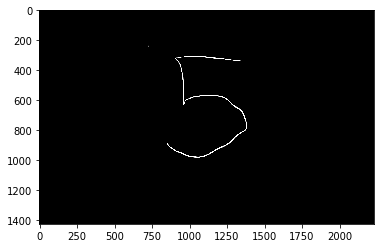

In [53]:
image2 = color.rgb2gray(io.imread("nb5.png"))
plt.imshow(image2)
image2_resize = resize(image2,size,anti_aliasing=True)

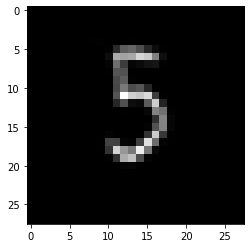

In [54]:
plt.imshow(image2_resize)

In [55]:
image2_resize = image2_resize.reshape(1, 28*28)
predicted_cluster2 = kmeans.predict(image2_resize)
y_pred[[predicted_cluster2]]


C:\Users\ouizb\anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  This is separate from the ipykernel package so we can avoid doing imports until


array([5.])

In [56]:
# Notification de la  nouvelle prédiction 
notify.send("Il a fini la nouvelle prédiction 3 Malika!")

Il a su le reconnaître c'est déjà! Mon modèle doit encore être amelioré. Il a encore du mal a bien classer les nombres. Je précise que ceux sont des images que j'ai moi même créer sur microsoft paint 2D donc les nombres sont manuscrit est-ce que ça joue ? Dans la mesure où il n'a pas était entraîner sur mon écriture faudrait creuser la question.